<a href="https://colab.research.google.com/github/djglab/Foxk1_manuscript/blob/main/notebooks/New_Figure_3ab_FOXK1_Nucleoatac_KO_ND_enriched_heatmap_showing_NFR_and_NOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this analysis is to use the resequenced data for one of the Day 5 replicates and run the nucleoatac analysis to get the percent of nucleosome free position for KO vs ND conditions.

#**Visualization of Nucleoatac signals for Foxk1 Knockout and No Dox at two time points Day3 and Day5**

In [ ]:
start_time0 <- Sys.time()

**Download and load the libraries required for the analysis**

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)
system('apt-get install libcairo2-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

In [ ]:
install.packages(c('gsl', 'devtools'))
install.packages('Cairo')
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c(
  'chromVAR', 'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr','SummarizedExperiment', 'gplots', 'circlize', 'plyr', 'dplyr', 'GenomicRanges'
))
devtools::install_github("GreenleafLab/chromVARmotifs")
devtools::install_github("jokergoo/EnrichedHeatmap")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("gsl", "devtools")):
“installation of package ‘gsl’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'dplyr'”
Installing package(s) 'BiocVersion', 'chromVAR',
  'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'SummarizedExperiment',
  'gplots', 'circlize', 'plyr', 'GenomicRanges'

also installing the dependencies ‘formatR’, ‘pracma’, ‘AnnotationDbi’, ‘R.oo’, ‘R.methodsS3’, ‘png’, ‘rjson’,

crayon (1.5.0 -> 1.5.1) [CRAN]
fansi  (1.0.2 -> 1.0.3) [CRAN]
tzdb   (0.2.0 -> 0.3.0) [CRAN]


Installing 3 packages: crayon, fansi, tzdb

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmp5K5UAs/remotes3b2d854830/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’ ... OK
* preparing ‘chromVARmotifs’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘chromVARmotifs_0.2.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




iterators    (NA -> 1.0.14 ) [CRAN]
foreach      (NA -> 1.5.2  ) [CRAN]
doParallel   (NA -> 1.0.17 ) [CRAN]
clue         (NA -> 0.3-60 ) [CRAN]
GetoptLong   (NA -> 1.0.5  ) [CRAN]
locfit       (NA -> 1.5-9.5) [CRAN]
ComplexHe... (NA -> 2.10.0 ) [CRAN]


Installing 7 packages: iterators, foreach, doParallel, clue, GetoptLong, locfit, ComplexHeatmap

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmp5K5UAs/remotes3b59efaa3/jokergoo-EnrichedHeatmap-b10a9e2/DESCRIPTION’ ... OK
* preparing ‘EnrichedHeatmap’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Removed empty directory ‘EnrichedHeatmap/test’
* building ‘EnrichedHeatmap_1.23.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install('BSgenome.Mmusculus.UCSC.mm10')

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'BSgenome.Mmusculus.UCSC.mm10'”
Old packages: 'EnrichedHeatmap', 'crayon', 'fansi', 'knitr', 'processx',
  'sass', 'tzdb', 'cluster', 'MASS', 'Matrix', 'nlme'



In [ ]:
library(chromVARmotifs)
library(chromVAR)
library(BSgenome.Mmusculus.UCSC.mm10)
library(motifmatchr)
library(SummarizedExperiment)
library(gplots)
library(circlize)
library(plyr)
library(dplyr)
library(GenomicRanges)
library(EnrichedHeatmap)



Loading required package: BSgenome

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading required package: GenomicRanges

Loading required package: Biostrings

Loadin

#**Read bed files to generate a combined Foxk1 ATAC-seq peak set**

**Read Bed files from S3 data storage MSI**

In [ ]:
s3_bed_files <- c(
  'FoxK1_KO_D3' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/Merged/FoxK1_KO_D3_merged_summits.bed',
  'FoxK1_KO_D5' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/Merged/FoxK1_KO_D5_merged_summits.bed',
  'iFoxk1_ND_D3' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/Merged/iFoxk1_ND_D3_merged_summits.bed',
  'iFoxk1_ND_D5' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/Merged/iFoxk1_ND_D5_merged_summits.bed',
  'iFoxk1_Dox_D3' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/Merged/iFoxk1_Dox_D3_merged_summits.bed',
  'iFoxk1_Dox_D5' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/Merged/iFoxk1_Dox_D5_merged_summits.bed')

In [ ]:
for (i in 1:length(s3_bed_files)){
  sprintf('wget -x -c -nH %s', s3_bed_files[i]) %>% system()
}
s3_bed_files <- gsub('https://s3.msi.umn.edu/', './', s3_bed_files)
message(sprintf('all s3_bed_files exist: %s', all(file.exists(s3_bed_files))))

all s3_bed_files exist: TRUE



**Generate the union peak set 'gr' using the bed files and 'gr' would be used to find FOXK1 motif binding sites**

In [ ]:
gr_list <- lapply(1:length(s3_bed_files), function(i){
  x <- read.table(s3_bed_files[i], header = FALSE, sep = '\t')
  gr <- GRanges(seqnames = x[, 1], range = IRanges(x[, 2], x[, 3]), peak_id = x[, 4], score = x[, 5])
  gr$source <- names(s3_bed_files)[i]
  gr
})

In [ ]:
library(parallel)

In [ ]:
gr <- Reduce('c', gr_list)
gr <- resize(gr, width = 200, fix = 'center')
gr0 <- reduce(gr) 
mm <- as.matrix(findOverlaps(gr, gr0))
sp <- split(mm[, 1], list(mm[, 2]))
j <- unlist(mclapply(sp, function(i) i[which.max(gr$score[i])], mc.cores = 4))
gr <- gr[j]
G <- do.call('cbind', lapply(1:length(s3_bed_files), function(i) gr %over% gr_list[[i]]))
gr$group <- G
colnames(gr$group) <- names(s3_bed_files)
gr

GRanges object with 133867 ranges and 4 metadata columns:
           seqnames            ranges strand |                peak_id     score
              <Rle>         <IRanges>  <Rle> |            <character> <numeric>
       [1]     chr1   3035833-3036032      * | iFoxk1_Dox_D3_merged..  16.37480
       [2]     chr1   3037805-3038004      * | FoxK1_KO_D3_merged_p..  13.40830
       [3]     chr1   3062824-3063023      * | FoxK1_KO_D3_merged_p..  89.41290
       [4]     chr1   3154548-3154747      * | FoxK1_KO_D3_merged_p..   3.97063
       [5]     chr1   3191506-3191705      * | FoxK1_KO_D3_merged_p..  12.58180
       ...      ...               ...    ... .                    ...       ...
  [133863]     chrY 90838921-90839120      * | iFoxk1_Dox_D3_merged..   3.98081
  [133864]     chrY 90839141-90839340      * | iFoxk1_Dox_D5_merged..   5.10343
  [133865]     chrY 90839651-90839850      * | iFoxk1_Dox_D3_merged..  13.26160
  [133866]     chrY 90841563-90841762      * | FoxK1_KO_D5_mer

#**Number of Peaks present in each condition and time point**

In [ ]:
peaks <- gr[gr$group[, 'FoxK1_KO_D3'] | gr$group[, 'FoxK1_KO_D5'] | gr$group[, 'iFoxk1_ND_D3'] | gr$group[, 'iFoxk1_ND_D5']]
message(sprintf('Total number of peaks: %d\n', length(peaks)))
message(sprintf('number of D3_KO peaks: %d\n', sum(peaks$group[, 'FoxK1_KO_D3'] & !peaks$group[, 'FoxK1_KO_D5'] & !peaks$group[, 'iFoxk1_ND_D3'] & !peaks$group[, 'iFoxk1_ND_D5'])))
message(sprintf('number of D3_ND peaks: %d\n', sum(!peaks$group[, 'FoxK1_KO_D3'] & !peaks$group[, 'FoxK1_KO_D5'] & peaks$group[, 'iFoxk1_ND_D3'] & !peaks$group[, 'iFoxk1_ND_D5'])))
message(sprintf('number of D5_KO peaks: %d\n', sum(!peaks$group[, 'FoxK1_KO_D3'] & peaks$group[, 'FoxK1_KO_D5'] & !peaks$group[, 'iFoxk1_ND_D3'] & !peaks$group[, 'iFoxk1_ND_D5'])))
message(sprintf('number of D5_ND peaks: %d\n', sum(!peaks$group[, 'FoxK1_KO_D3'] & !peaks$group[, 'FoxK1_KO_D5'] & !peaks$group[, 'iFoxk1_ND_D3'] & peaks$group[, 'iFoxk1_ND_D5'])))

Total number of peaks: 114231


number of D3_KO peaks: 17097


number of D3_ND peaks: 19533


number of D5_KO peaks: 12093


number of D5_ND peaks: 6465




#**Loading FOXK1 motif data and extracting Positional Weight Matrix for Foxk1**

In [ ]:
data("mouse_pwms_v2") 

In [ ]:
mouse_pwms_v2['ENSMUSG00000056493_LINE1094_Foxk1_D_N2']

PWMatrixList of length 1
names(1): ENSMUSG00000056493_LINE1094_Foxk1_D_N2

In [ ]:
binding_sites <- matchMotifs(
mouse_pwms_v2['ENSMUSG00000056493_LINE1094_Foxk1_D_N2'], 
resize(gr, width = 200, fix = 'center'),
genome = BSgenome.Mmusculus.UCSC.mm10,
p.cutoff = 5e-05,
out = 'positions'
)[[1]]


In [ ]:
dat <- data.frame(binding_sites)

In [ ]:
sprintf('number of Foxk1 peaks in FoxK1_ATAC: %d', length(binding_sites)) %>% message()

number of Foxk1 peaks in FoxK1_ATAC: 6196



In [ ]:
seqlevels(binding_sites) <- seqlevels(BSgenome.Mmusculus.UCSC.mm10)
seqlengths(seqinfo(binding_sites)) <- seqlengths(BSgenome.Mmusculus.UCSC.mm10)
genome(seqinfo(binding_sites)) <- providerVersion(BSgenome.Mmusculus.UCSC.mm10)

Warning message:
“  Using providerVersion() on a BSgenome object is deprecated. Please use
  'metadata(x)$genome' instead.”


#**Read the Nucleoatac signal Big Wig Files and prepare normalized matrix for EnrichedHeatmap**

**Set the parameters for Enriched heatmap to show a 2000 bp region and setting the target width to include 200 bp region for FOXK1 binding sites**

In [ ]:
extend <- 1000
smooth <- FALSE
target_ratio <- 0.2
mc.cores <- 2
target_width <- width(binding_sites)[1]
message(sprintf('target width: %d\n', target_width))

target width: 8




**Download and read the nucleoatac bigwig files for the KO and ND on D3 and D5, after that we generate a normalized matrix which would be the input for the enriched heatmap**

In [ ]:
s3_bw_files <- c(
  'FoxK1_KO_D3' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/NA_all/FoxK1_KO_D3.nucleoatac_signal.smooth.bw',
  'FoxK1_KO_D5' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/NA_all/FoxK1_KO_D5.nucleoatac_signal.smooth.bw',
  'iFoxk1_ND_D3' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/NA_all/iFoxk1_ND_D3.nucleoatac_signal.smooth.bw',
  'iFoxk1_ND_D5' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/NA_all/iFoxk1_ND_D5_S1.nucleoatac_signal.smooth.bw' ## new nucleoatac file with merged D5 data and using FOXK1 binding sites extended to 4000 as the bed file
)

In [ ]:
for (i in 1:length(s3_bw_files)){
  sprintf('wget -x -c -nH %s', s3_bw_files[i]) %>% system()
}
s3_bw_files <- gsub('https://s3.msi.umn.edu/', './', s3_bw_files)
message(sprintf('all s3_bw_files exist: %s', all(file.exists(s3_bw_files))))

all s3_bw_files exist: TRUE



In [ ]:
ko_d3 <- rtracklayer::import.bw(s3_bw_files[['FoxK1_KO_D3']], 
                          which = trim(GenomicRanges::reduce(resize(binding_sites, fix = 'center', width = target_width + extend * 2)))
)

In [ ]:
ko_d5 <- rtracklayer::import.bw(s3_bw_files[['FoxK1_KO_D5']], 
                          which = trim(GenomicRanges::reduce(resize(binding_sites, fix = 'center', width = target_width + extend * 2)))
)

In [ ]:
nd_d3 <- rtracklayer::import.bw(
  s3_bw_files[['iFoxk1_ND_D3']],
  which = trim(GenomicRanges::reduce(resize(binding_sites, fix = 'center', width = target_width + extend * 2)))
)

In [ ]:
nd_d5 <- rtracklayer::import.bw(s3_bw_files[['iFoxk1_ND_D5']], 
                          which = trim(GenomicRanges::reduce(resize(binding_sites, fix = 'center', width = target_width + extend * 2)))
)

#**Supervised clustering**

**Reading the bigwig files to generate a matrix that would be used to split the data into 2 groups:**
***NFR (Nucleosome Free Region)***
**&**
***NOR (Nucleosome Ocupied Region)***

In [ ]:
bw <- lapply(s3_bw_files, function(bw_file){
 rtracklayer::import.bw(
    bw_file, 
    which = trim(GenomicRanges::reduce(resize(binding_sites, fix = 'center', width = target_width + extend * 2)))
  ) 
})

In [ ]:
cvg_bd <- lapply(bw, function(x){coverage(x, weight = 'score')[resize(binding_sites, fix = 'center', width = 2200)] %>% as.matrix()})

#**Understanding individual timepoint and condition**

**Splitting the groups for individual time points and conditions the heatmap when the data is split by groups for individual timepoint and condition.**

**aggregating and calculating the median for the median of the 200bp regions (upstream and downstream 100 each) for conditions and time in order to get a value to be used as a cutoff to split the data into NFR and NOR**

In [ ]:
split_med <- mean(do.call('rbind', lapply(cvg_bd, function(c){median(rowMeans(c[,c(1001:1200)]))})))

#**Looking at the rowmeans for the 200bp regions of all the condition and time points and then splitting them into 2 groups of NOR and NFR**

**After looking at the quantiles, selecting the cutoff: The ones below or above as the NOR and NFR regions respectively. Looking at the D3 KO and ND as well as D5 KO.**

**Taking the center upstream and downstream 100bp each to create a combined matrix for the D3 and D5, KO and ND conditions and get the rowmeans to split them into the NORand NFR using the 'split_med' as a cutoff.**

In [ ]:
grp <- lapply(cvg_bd, function(c){cut(rowMeans(c[, c(1001:1200)]), breaks = c(-Inf, split_med, Inf), 
                     labels = c("NFR", "NOR"))
})

**Generating** **a matrix (cov_gr) containing the clusters**

In [ ]:
group <- lapply(grp, function(g){as.character(g)})

In [ ]:
cov_gr <- do.call(cbind, group)

In [ ]:
bs <- binding_sites

In [ ]:
mcols(bs) <- cov_gr

**Now we generate normalized matrix for each condition and time point to be used for Enriched Heatmap**

Normalized Matrix for ND D3

In [ ]:
mat_foxk1_nd_d3 <- normalizeToMatrix(
  resize(nd_d3, fix = 'center', width = 200), 
  binding_sites, 
  extend = extend, 
  value_column = 'score', 
  mean_mode = 'w0',
  w = 20,
  target_ratio = 0.1,
  smooth = TRUE)

Normalized Matrix for ND D5

In [ ]:
mat_foxk1_nd_d5 <- normalizeToMatrix(
  resize(nd_d5, fix = 'center', width = 200), 
  binding_sites, 
  extend = extend, 
  value_column = 'score', 
  mean_mode = 'w0',
  w = 20,
  target_ratio = 0.1,
  smooth = TRUE)

Normalized Matrix for KO D3

In [ ]:
mat_foxk1_ko_d3 <- normalizeToMatrix(
  resize(ko_d3, fix = 'center', width = 200), 
  binding_sites, 
  extend = extend, 
  value_column = 'score', 
  mean_mode = 'w0',
  w = 20,
  target_ratio = 0.1,
  smooth = TRUE)

Normalized Matrix for KO D5

In [ ]:
mat_foxk1_ko_d5 <- normalizeToMatrix(
  resize(ko_d5, fix = 'center', width = 200), 
  binding_sites, 
  extend = extend, 
  value_column = 'score', 
  mean_mode = 'w0',
  w = 20,
  target_ratio = 0.1,
  smooth = TRUE)

#**Determining the group to split the the enriched heatmap**

**4 Clusters are generated when we use the D5 KO and ND conditions and it helps us with the visualization of data if we have fewer clusters**

In [ ]:
sp1 <- factor(sprintf('%s:%s', cov_gr[, 'iFoxk1_ND_D3'], cov_gr[, 'FoxK1_KO_D3']))
sprintf('number of clusters: %d', length(unique(sp1))) %>% message()

number of clusters: 4



In [ ]:
sp <- factor(sprintf('%s:%s', cov_gr[, 'iFoxk1_ND_D5'], cov_gr[, 'FoxK1_KO_D5']))
sprintf('number of clusters: %d', length(unique(sp))) %>% message()

number of clusters: 4



**Color scheme for the heatmap**

In [ ]:
col_nd_d3 = circlize::colorRamp2(quantile(mat_foxk1_nd_d3, c(0.005, 0.995)), c("white", "red"))
col_nd_d5 = circlize::colorRamp2(quantile(mat_foxk1_nd_d5, c(0.005, 0.995)), c("white", "red"))
col_ko_d3 = circlize::colorRamp2(quantile(mat_foxk1_ko_d3, c(0.005, 0.995)), c("white", "blue"))
col_ko_d5 = circlize::colorRamp2(quantile(mat_foxk1_ko_d5, c(0.005, 0.995)), c("white", "blue"))

**Annotation for the Heatmap**

In [ ]:
ta <- HeatmapAnnotation(
  enriched = anno_enriched(gp = gpar(lty = 1, lwd = 2, col = 1:nlevels(sp1)),
ylim = c(0,0.5)
  )
)

**Enriched Heatmap**

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



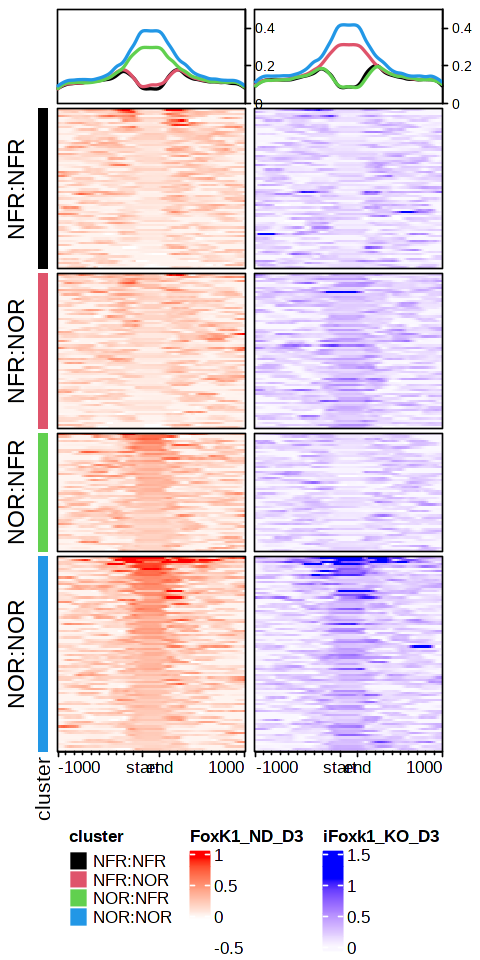

In [ ]:
h <- Heatmap(sp1, col = structure(1:nlevels(sp)), name = "cluster", width = unit(2, 'mm'), row_order = order(enriched_score(mat_foxk1_nd_d3), decreasing = TRUE)) +
     EnrichedHeatmap(mat_foxk1_nd_d3, col = col_nd_d3, name = 'FoxK1_ND_D3', top_annotation = ta, pos_line = FALSE) +
     EnrichedHeatmap(mat_foxk1_ko_d3, col = col_ko_d3, name = 'iFoxk1_KO_D3', top_annotation = ta, pos_line = FALSE) 


options(repr.plot.width = 4, repr.plot.height = 8)
draw(h, heatmap_legend_side = 'bottom', split = sp1)

In [ ]:
message(sprintf('number of D3 peaks NOR in both : %d\n', length(sp1[sp1 == 'NOR:NOR'])))
message(sprintf('number of D3 peaks NOR in Control and NFR in Foxk1 KO: %d\n', length(sp1[sp1 == 'NOR:NFR'])))
message(sprintf('number of D3 peaks NFR in Control and NOR in Foxk1 KO : %d\n', length(sp1[sp1 == 'NFR:NOR'])))
message(sprintf('number of D3 peaks NFR in both: %d\n', length(sp1[sp1 == 'NFR:NFR'])))

number of D3 peaks NOR in both : 1925


number of D3 peaks NOR in Control and NFR in Foxk1 KO: 1166


number of D3 peaks NFR in Control and NOR in Foxk1 KO : 1527


number of D3 peaks NFR in both: 1578




`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



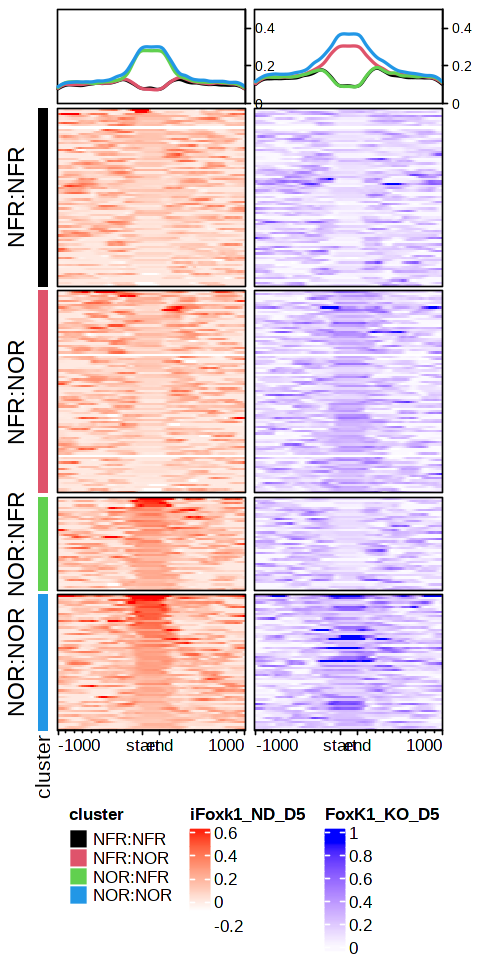

In [ ]:
h <- Heatmap(sp, col = structure(1:nlevels(sp)), name = "cluster", width = unit(2, 'mm'), row_order = order(enriched_score(mat_foxk1_nd_d5), decreasing = TRUE)) +
     EnrichedHeatmap(mat_foxk1_nd_d5, col = col_nd_d5, name = 'iFoxk1_ND_D5', top_annotation = ta, pos_line = FALSE) +
     EnrichedHeatmap(mat_foxk1_ko_d5, col = col_ko_d5, name = 'FoxK1_KO_D5', top_annotation = ta, pos_line = FALSE)


options(repr.plot.width = 4, repr.plot.height = 8)
draw(h, heatmap_legend_side = 'bottom', split = sp)

In [ ]:
message(sprintf('number of D5 peaks NOR in both : %d\n', length(sp[sp == 'NOR:NOR'])))
message(sprintf('number of D5 peaks NOR in Control and NFR in Foxk1 KO: %d\n', length(sp[sp == 'NOR:NFR'])))
message(sprintf('number of D5 peaks NFR in Control and NOR in Foxk1 KO : %d\n', length(sp[sp == 'NFR:NOR'])))
message(sprintf('number of D5 peaks NFR in both: %d\n', length(sp[sp == 'NFR:NFR'])))

number of D5 peaks NOR in both : 1380


number of D5 peaks NOR in Control and NFR in Foxk1 KO: 942


number of D5 peaks NFR in Control and NOR in Foxk1 KO : 2062


number of D5 peaks NFR in both: 1812




In [ ]:
Sys.time() - start_time0

Time difference of 1.155831 hours

In [ ]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] parallel  grid      stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] stringr_1.4.0                            
 [2] ggplot2_3.3.5                            
 [3] clusterProfiler_4.2.2                    
 [4] org.Mm.eg.db_3.14.0                      
 [5] TxDb.Mmusculus.UCSC.mm10.knownGene_3.10.0